In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import pymongo
from pymongo import MongoClient

In [2]:
# Set up the DataBase Connection
client = MongoClient()
db = client.SpeedTest

In [3]:
posts = db.FromSwitch.find()

In [4]:
# Code for some text reporting format might use later
# for post in posts:
#     res = pprint.pprint('{0}, {1}, {2}, {3}'.format(post['localTime'], 
#         post['download'],post['upload'],post['ping']))

In [5]:
db_list = list(posts)

In [6]:
db_df = pd.DataFrame(db_list)
len(db_df)

197

In [7]:
clean_df = db_df.drop(db_df.tail(3).index)
clean_df = clean_df.drop(columns=['_id','timeStamp'])

In [8]:
clean_df = clean_df.set_index(pd.DatetimeIndex(clean_df['localTime'])).drop(columns='localTime')

In [9]:
sorted_df = clean_df.groupby([clean_df.index.day ,clean_df.index.hour]).mean()

# Report on Netowrk Data By Big Brain Brandon Leal

The data comes from a computer script that runs from a dell laptop to the switch in the server room.
Every 15 minutes a record is taken for the, download, upload, ping, and date from a test server.
These results are in Megabits.

### Data Table (Averaged for every hour)

In [10]:
sorted_df = clean_df.groupby([clean_df.index.day ,clean_df.index.hour]).mean()
sorted_df.index.rename(['Day','Hour'], inplace=True)

In [11]:
sorted_df.describe()

,download,ping,upload
count,50.000000,50.000000,50.000000
mean,182.063709,17.215253,20.413718
std,12.317708,3.612697,1.931953
min,144.540090,14.266000,11.537182
25%,177.255082,15.720250,20.507487
50%,182.877424,16.251125,20.846355
75%,189.357640,16.959036,21.290958
max,205.163001,37.338750,21.662178


In [12]:
sorted_df

download       ping     upload
Day Hour                                  
11  7     182.209512  20.288500  21.659824
    8     181.798835  16.969714  20.410603
    9     182.111310  19.627200  20.963835
    10    144.540090  16.872000  20.487856
    11    169.595698  16.784167  20.945090
    12    176.991576  15.807750  20.986718
    13    170.284439  15.884000  20.824509
    14    178.702889  16.337750  20.601437
    15    172.606765  15.959500  21.051360
    16    170.319839  16.019250  20.412835
    17    185.345643  17.405250  21.296334
    18    178.507034  16.759000  20.301354
    19    145.373922  37.338750  11.537182
    20    199.780921  23.269500  17.536039
    21    176.267435  15.614750  20.599749
    22    192.474421  16.415750  21.274831
    23    185.970346  15.310250  21.391243
12  0     167.367520  16.305000  21.028869
    1     181.405825  17.318750  21.434250
    2     163.768245  16.129000  21.434148
    3     179.362230  16.044250  21.662178
    4     180.131532  16.883750  21.270188
    5     183.349676  19.291750  21.148854
    6     179.251993  16.366500  20.251672
    7     186.470255  16.858500  21.050571
    8     194.397477  17.070750  20.601020
    9     178.045600  18.115500  20.260985
    10    184.924079  16.927000  20.704228
    11    169.158619  14.891800  19.917639
    12    159.939251  17.992000  20.758582
    14    197.452947  15.765000  21.003558
    15    191.148011  14.266000  20.801577
    16    186.422332  14.718250  20.864641
    17    195.291612  16.487750  21.384712
    18    186.949488  15.718000  21.586185
    19    205.163001  26.177250  12.606517
    20    198.310347  21.326750  16.914764
    21    182.405173  14.383250  20.819112
    22    198.120698  16.197250  21.383417
    23    193.128250  16.182000  21.366636
13  0     181.008680  15.284250  21.233366
    1     191.275708  15.688750  21.565665
    2     188.134397  15.535250  21.399067
    3     195.030690  15.683250  20.694012
    4     183.857485  16.442000  19.271793
    5     187.062846  15.462500  21.464821
    6     189.620232  15.838250  20.828070
    7     175.983453  15.246250  20.566382
    8     188.569862  15.727000  20.726177
    9     187.797281  15.776000  20.401452

In [13]:
customY_df = sorted_df.reset_index()
customY_df['Day : Hour'] = customY_df['Day'].map(str) + ' : ' +customY_df['Hour'].map(str)
# dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]
customY_df.drop(columns=['Day', 'Hour'], inplace=True)
# customY_df.tail()

In [14]:
# fig, ax = plt.subplots(figsize=(16, 8))

# download_s = customY_df['download']
# upload_s = customY_df['upload']
# ping_s = customY_df['ping']
# date_s = customY_df['Day : Hour']
# xmax = date_s.iloc[-1]
# xmin = date_s.iloc[0]

# down = ax.plot(date_s,
#                download_s )
# upload = ax.plot(date_s,
#                upload_s )
# ping = ax.plot(date_s,
#                ping_s )

# plt.xlim(xmin,xmax)
# plt.ylim(0,205)
# plt.title('Hourly Change in Records Since Recording')
# plt.ylabel('mpbs')
# plt.xlabel('Day : Hour')
# plt.grid(True)
# plt.legend()

# # Every other label
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)
    
# plt.show()

In [15]:
date_line_df = sorted_df.reset_index()
date_line_df['Hour'] = date_line_df['Hour']+1
june11th = date_line_df[date_line_df['Day']==11]
june12th = date_line_df[date_line_df['Day']==12]
june13th = date_line_df[date_line_df['Day']==13]

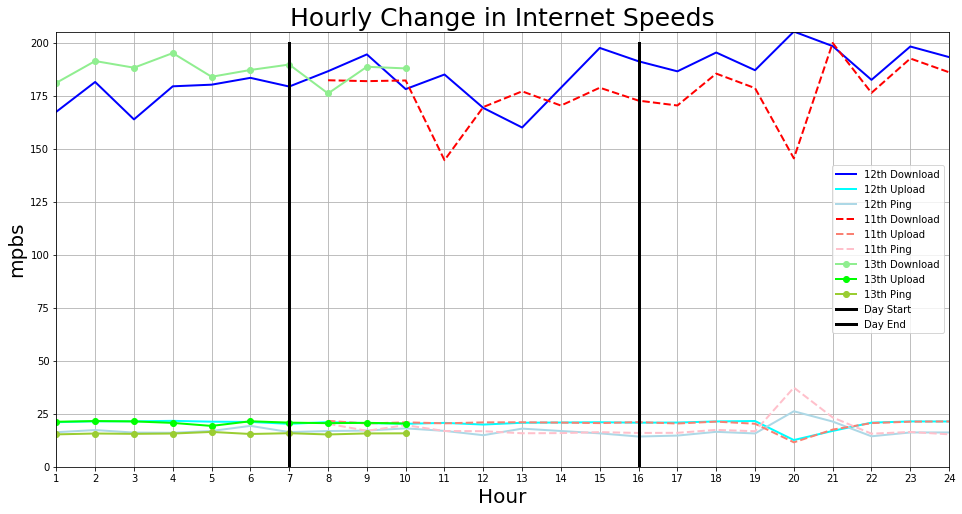

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))

download_j11 = june11th['download']
upload_j11 = june11th['upload']
ping_j11 = june11th['ping']
date_j11 = june11th['Hour']

download_j12 = june12th['download']
upload_j12 = june12th['upload']
ping_j12 = june12th['ping']
date_j12 = june12th['Hour']

download_j13 = june13th['download']
upload_j13 = june13th['upload']
ping_j13 = june13th['ping']
date_j13 = june13th['Hour']

# 'o-'

# lol = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

# xmax = date_s.iloc[-1]
# xmin = date_s.iloc[0]

down12 = ax.plot(date_j12,
                download_j12,
                linewidth=2,
                color='blue',
                label='12th Download')

upload12 = ax.plot(date_j12,
                    upload_j12,
                    color='aqua',
                    linewidth=2,
                    label='12th Upload')

ping12 = ax.plot(date_j12,
                ping_j12,
                color='lightblue',
                linewidth=2,
                label='12th Ping')



down11 = ax.plot(date_j11,
                    download_j11,
                    '--',
                     color='red',
                    linewidth=2,
                    label='11th Download')

upload11 = ax.plot(date_j11,
                    upload_j11,
                    '--',
                   color='salmon',
                    linewidth=2,
                    label='11th Upload')

ping11 = ax.plot(date_j11,
                ping_j11,
                '--',
                 color='pink',
                linewidth=2,
                label='11th Ping')



down13 = ax.plot(date_j13,
                    download_j13,
                    'o-',
                     color='lightgreen',
                    linewidth=2,
                    label='13th Download')

upload13 = ax.plot(date_j13,
                    upload_j13,
                    'o-',
                   color='lime',
                    linewidth=2,
                    label='13th Upload')

ping13 = ax.plot(date_j13,
                ping_j13,
                'o-',
                 color='yellowgreen',
                linewidth=2,
                label='13th Ping')



sales_start = ax.plot([7,7],[1,200],
                        color='black',
                        linewidth=3,
                        label='Day Start')

sales_end = ax.plot([16,16],[1,200],
                    color='black',
                    linewidth=3,
                    label='Day End')

plt.legend()
plt.xlim(1,24)
plt.ylim(0,205)
plt.title('Hourly Change in Internet Speeds',fontsize=25)
plt.ylabel('mpbs',fontsize=20)
plt.xlabel('Hour',fontsize=20)
plt.grid(True)

# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)
plt.xticks(list(range(1,25)))

plt.savefig('Hourly Change in Internet Speeds.png',dpi=600 ,quality=95)
plt.show()


In [17]:
hourly_avg_df = sorted_df.reset_index().groupby('Hour').mean()
hourly_avg_df = hourly_avg_df.reset_index().drop(columns='Day')
#correct for 12 pm by adding +1 
hourly_avg_df['Hour'] = hourly_avg_df['Hour'] +1

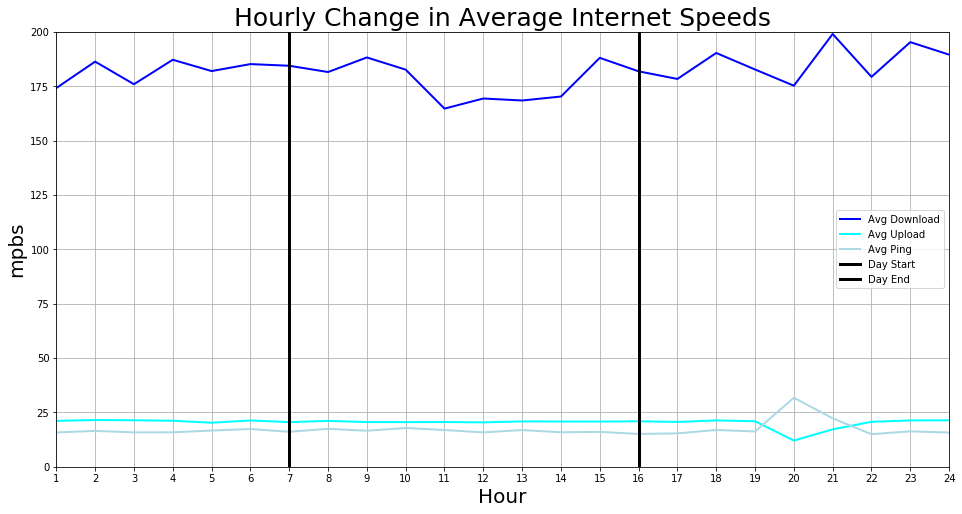

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))

download_avg = hourly_avg_df['download']
upload_avg = hourly_avg_df['upload']
ping_avg = hourly_avg_df['ping']
date_avg = hourly_avg_df['Hour']

downavg = ax.plot(date_avg,
                download_avg,
                linewidth=2,
                color='blue',
                label='Avg Download')

uploadavg = ax.plot(date_avg,
                    upload_avg,
                    color='aqua',
                    linewidth=2,
                    label='Avg Upload')

pingavg = ax.plot(date_avg,
                ping_avg,
                color='lightblue',
                linewidth=2,
                label='Avg Ping')



sales_start = ax.plot([7,7],[1,200],
                        color='black',
                        linewidth=3,
                        label='Day Start')

sales_end = ax.plot([16,16],[1,200],
                    color='black',
                    linewidth=3,
                    label='Day End')

plt.legend()
plt.xlim(1,24)
plt.ylim(0,200)
plt.title('Hourly Change in Average Internet Speeds',fontsize=25)
plt.ylabel('mpbs',fontsize=20)
plt.xlabel('Hour',fontsize=20)
plt.grid(True)

# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)
plt.xticks(list(range(1,25)))

plt.savefig('Hourly Change Average Speeds.png',dpi=600 ,quality=95)
plt.show()


In [19]:
std_avg = sorted_df['download'].std()

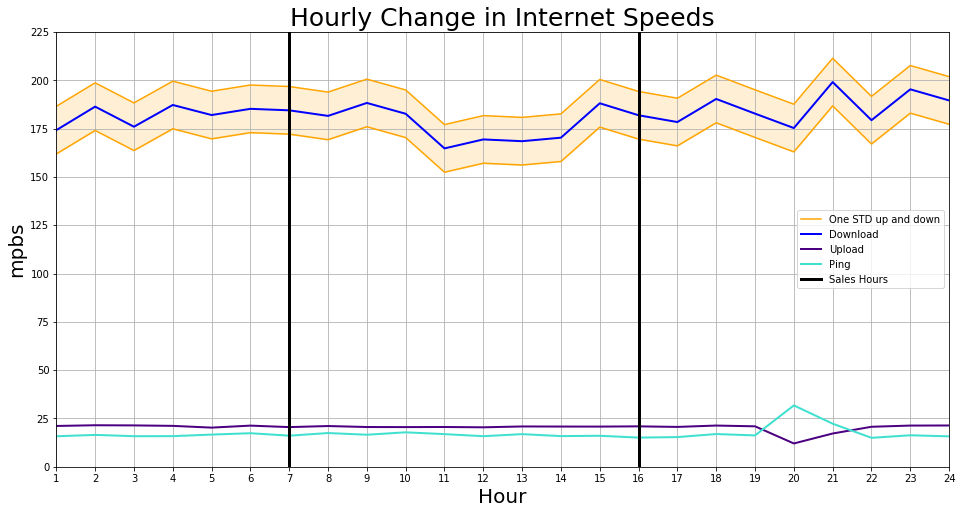

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))

download_avg = hourly_avg_df['download']
upload_avg = hourly_avg_df['upload']
ping_avg = hourly_avg_df['ping']
date_avg = hourly_avg_df['Hour']

# std bars
down_one_std = download_avg - std_avg
up_one_std = download_avg + std_avg


# STD bars and fill
lower_bar = ax.plot(date_avg,
                    down_one_std,
                   color='orange',
                   label='')

upper_bar = ax.plot(date_avg,
                    up_one_std,
                   color='orange',
                   label='One STD up and down')

filler = ax.fill_between(date_avg, down_one_std, up_one_std, color='papayawhip')

# Plots
downavg = ax.plot(date_avg,
                download_avg,
                linewidth=2,
                color='blue',
                label='Download')

uploadavg = ax.plot(date_avg,
                    upload_avg,
                    color='indigo',
                    linewidth=2,
                    label='Upload')

pingavg = ax.plot(date_avg,
                ping_avg,
                color='turquoise',
                linewidth=2,
                label='Ping')


sales_start = ax.plot([7,7],[1,225],
                        color='black',
                        linewidth=3,
                        label='Sales Hours')

sales_end = ax.plot([16,16],[1,225],
                    color='black',
                    linewidth=3,
                    label='')

#Touch ups
plt.legend()
plt.xlim(1,24)
plt.ylim(0,225)
plt.title('Hourly Change in Internet Speeds',fontsize=25)
plt.ylabel('mpbs',fontsize=20)
plt.xlabel('Hour',fontsize=20)
plt.grid(True)
plt.xticks(list(range(1,25)))

plt.savefig('Hourly Change Average Speeds.png',dpi=600 ,quality=95)
plt.show()
